In [1]:
import pandas as pd
import os
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Populating the interactive namespace from numpy and matplotlib


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
btc = pd.read_csv('datasets/btc.csv')

In [4]:
X = btc.columns

In [5]:
len(X)

144

In [6]:
CorrMatrix = btc.corr()

In [7]:
CorrMatrix

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,1.000000,-0.295957,0.959652,0.932884,0.108487,0.934049,0.945186,-0.154716,0.688873,0.937239,...,0.969170,0.415725,0.620344,-0.149944,0.471445,-0.093965,0.816682,-0.101739,-0.504837,-0.255180
AdrBal1in100KCnt,-0.295957,1.000000,-0.311911,-0.254478,-0.331607,-0.398082,-0.275746,-0.163269,-0.459963,-0.252451,...,-0.317946,-0.382872,-0.059261,0.196454,-0.053100,0.098166,-0.106880,-0.328383,-0.649076,0.107336
AdrBal1in100MCnt,0.959652,-0.311911,1.000000,0.978567,0.110501,0.964173,0.991210,-0.160749,0.705385,0.973496,...,0.936033,0.342639,0.596460,-0.158842,0.467595,-0.100729,0.784030,-0.133679,-0.485315,-0.270235
AdrBal1in10BCnt,0.932884,-0.254478,0.978567,1.000000,0.108065,0.895520,0.996777,-0.190684,0.583663,0.997028,...,0.891673,0.260677,0.683952,-0.128747,0.530808,-0.080340,0.810682,-0.218496,-0.405083,-0.215870
AdrBal1in10KCnt,0.108487,-0.331607,0.110501,0.108065,1.000000,0.109859,0.108865,-0.061891,0.036024,0.107419,...,0.110097,0.072873,0.309664,-0.113349,0.229333,-0.057074,0.357296,0.058248,-0.421704,-0.332325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,-0.093965,0.098166,-0.100729,-0.080340,-0.057074,-0.138490,-0.087445,-0.144013,-0.239874,-0.079789,...,-0.101216,-0.120343,-0.067188,0.934852,-0.058092,1.000000,-0.101490,-0.099275,0.518596,0.123766
TxTfrValMedUSD,0.816682,-0.106880,0.784030,0.810682,0.357296,0.710752,0.803434,-0.503479,0.451780,0.820305,...,0.745514,0.126008,0.647192,-0.211772,0.501146,-0.101490,1.000000,-0.326634,-0.202220,-0.050680
VelCur1yr,-0.101739,-0.328383,-0.133679,-0.218496,0.058248,0.015809,-0.191981,0.237018,0.354171,-0.204888,...,-0.056968,0.484088,-0.284704,-0.133374,-0.204912,-0.099275,-0.326634,1.000000,0.039563,-0.066300
VtyDayRet180d,-0.504837,-0.649076,-0.485315,-0.405083,-0.421704,-0.584099,-0.432093,0.600602,-0.703672,-0.404610,...,-0.562346,-0.288359,-0.200798,0.316258,-0.149444,0.518596,-0.202220,0.039563,1.000000,0.580388


In [8]:
CorrMatrix['PriceUSD']

AdrActCnt           0.678202
AdrBal1in100KCnt   -0.068116
AdrBal1in100MCnt    0.675125
AdrBal1in10BCnt     0.769321
AdrBal1in10KCnt     0.378985
                      ...   
TxTfrValMedNtv     -0.076248
TxTfrValMedUSD      0.723620
VelCur1yr          -0.347565
VtyDayRet180d      -0.215754
VtyDayRet30d       -0.100315
Name: PriceUSD, Length: 143, dtype: float64

In [9]:
CorrMatrix = CorrMatrix[abs(CorrMatrix['PriceUSD'])>= 0.5]

In [10]:
CorrMatrix['AdrBal1in100KCnt']

AdrActCnt             -0.295957
AdrBal1in100MCnt      -0.311911
AdrBal1in10BCnt       -0.254478
AdrBal1in10MCnt       -0.398082
AdrBal1in1BCnt        -0.275746
                         ...   
SplyMiner1HopAllUSD   -0.069581
TxTfrCnt              -0.317946
TxTfrValAdjUSD        -0.059261
TxTfrValMeanUSD       -0.053100
TxTfrValMedUSD        -0.106880
Name: AdrBal1in100KCnt, Length: 77, dtype: float64

In [11]:
for el in CorrMatrix.columns:
    if el not in CorrMatrix.index:
        del CorrMatrix[el]

In [12]:
CorrMatrix

,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv1Cnt,...,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxTfrCnt,TxTfrValAdjUSD,TxTfrValMeanUSD,TxTfrValMedUSD
AdrActCnt,1.000000,0.959652,0.932884,0.934049,0.945186,0.937239,0.928103,0.944100,0.953823,0.954784,...,0.900213,0.853412,0.844231,0.679410,-0.022894,0.686367,0.969170,0.620344,0.471445,0.816682
AdrBal1in100MCnt,0.959652,1.000000,0.978567,0.964173,0.991210,0.973496,0.973594,0.988802,0.997059,0.990053,...,0.927219,0.883889,0.876528,0.676142,-0.009558,0.681569,0.936033,0.596460,0.467595,0.784030
AdrBal1in10BCnt,0.932884,0.978567,1.000000,0.895520,0.996777,0.997028,0.999592,0.998044,0.991216,0.944343,...,0.850554,0.801699,0.794089,0.770129,-0.077600,0.774616,0.891673,0.683952,0.530808,0.810682
AdrBal1in10MCnt,0.934049,0.964173,0.895520,1.000000,0.924100,0.890414,0.886737,0.917531,0.943153,0.991264,...,0.987330,0.964654,0.959320,0.556181,0.149604,0.562381,0.935112,0.486358,0.386907,0.710752
AdrBal1in1BCnt,0.945186,0.991210,0.996777,0.924100,1.000000,0.992123,0.994362,0.999710,0.998192,0.964921,...,0.880494,0.832960,0.825447,0.730715,-0.056711,0.735435,0.911087,0.648442,0.505271,0.803434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SplyMiner1HopAllUSD,0.686367,0.681569,0.774616,0.562381,0.735435,0.799257,0.789274,0.743690,0.717140,0.631329,...,0.562251,0.549392,0.558272,0.999066,-0.588502,1.000000,0.609830,0.868789,0.649163,0.733426
TxTfrCnt,0.969170,0.936033,0.891673,0.935112,0.911087,0.892654,0.885235,0.908139,0.924284,0.944372,...,0.910866,0.870070,0.860127,0.603598,0.012713,0.609830,1.000000,0.558256,0.420760,0.745514
TxTfrValAdjUSD,0.620344,0.596460,0.683952,0.486358,0.648442,0.714152,0.698508,0.656610,0.630066,0.549050,...,0.491936,0.479702,0.488847,0.877683,-0.550310,0.868789,0.558256,1.000000,0.767116,0.647192
TxTfrValMeanUSD,0.471445,0.467595,0.530808,0.386907,0.505271,0.557788,0.542399,0.511016,0.491325,0.432518,...,0.393160,0.382940,0.390821,0.657858,-0.442379,0.649163,0.420760,0.767116,1.000000,0.501146


In [13]:
CorrMatrix['PriceUSD']

AdrActCnt              0.678202
AdrBal1in100MCnt       0.675125
AdrBal1in10BCnt        0.769321
AdrBal1in10MCnt        0.555003
AdrBal1in1BCnt         0.729836
                         ...   
SplyMiner1HopAllUSD    0.999164
TxTfrCnt               0.602541
TxTfrValAdjUSD         0.877199
TxTfrValMeanUSD        0.657217
TxTfrValMedUSD         0.723620
Name: PriceUSD, Length: 77, dtype: float64

In [14]:
correlated_features = dict()
for feat1 in CorrMatrix.columns:
    if feat1 != "PriceUSD": 
        correlated_features[feat1] = []
        for feat2 in CorrMatrix.columns:
            if abs(CorrMatrix[feat1][feat2]) > 0.9 and feat1 != feat2:
                if feat1 != "PriceUSD" and feat2 != "PriceUSD":
                    correlated_features[feat1].append(feat2)

In [15]:
highlyCorrelated = list()
corSet = set()
for column in correlated_features.keys():
    maxCor = 0
    bestCor = None
    for el in correlated_features[column] + [column]:
        if abs(CorrMatrix['PriceUSD'][el]) > maxCor:
            maxCor = abs(CorrMatrix['PriceUSD'][el])
            bestCor = el
            
    highlyCorrelated.append(bestCor)
    corSet.add(bestCor)

In [16]:
len(list(corSet))

20

In [17]:
for el in list(corSet):
    print(el + " " + str(CorrMatrix['PriceUSD'][el]))

AdrBalUSD10KCnt 0.9821744354688466
TxTfrValAdjUSD 0.8771991625686137
AdrBalUSD10Cnt 0.895705238265752
SplyAdrBalUSD10K 0.549062470115893
SplyMiner1HopAllNtv -0.5902008967764314
TxTfrValMeanUSD 0.6572171551462382
AdrBalNtv0.01Cnt 0.7381903889819359
FeeMeanUSD 0.5175432443311527
FlowInExUSD 0.8442750392180502
AdrBal1in100MCnt 0.675125141724985
SplyAdrBalUSD100K 0.6487983019587369
TxTfrValMedUSD 0.7236200709974796
SplyAdrBalUSD10M 0.8379066818868521
AdrBalCnt 0.7950820297103433
AssetEODCompletionTime 0.7089935032350656
AdrBalUSD1KCnt 0.9566186788363377
AdrBalUSD100Cnt 0.9355593452810728
SplyMiner0HopAllUSD 0.9999860941622307
SplyAdrBalUSD1M 0.7867901509504597
AdrBalUSD10MCnt 0.9973885100010248


In [18]:
#"""""""""""""""""""""""""""""""""""""""""""""""

In [19]:
btc = btc[btc['PriceUSD'].isna() == False]

In [20]:
btc.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
555,2010-07-18,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,...,396.0,17180.55,1474.778412,48.783737,4.187596,1.850,0.158804,1.820565,NaN,NaN
556,2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,...,512.0,40243.73,3251.693384,86.951152,7.025653,2.625,0.212100,1.828863,NaN,NaN
557,2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,...,738.0,16063.23,1200.497201,42.528835,3.178423,1.375,0.102762,1.831412,NaN,NaN
558,2010-07-21,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,...,377.0,20834.15,1649.915979,71.822334,5.687816,18.500,1.465068,1.833749,NaN,NaN
559,2010-07-22,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,...,344.0,33049.03,1932.368865,112.714622,6.590397,1.010,0.059054,1.840245,NaN,NaN


In [21]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.085840
556,2010-07-19,0.080800
557,2010-07-20,0.074736
558,2010-07-21,0.079193
559,2010-07-22,0.058470


In [22]:
btc['PriceUSD'] = btc.PriceUSD.shift(-1) # shift price for 1 day
btc = btc[:-1] # remove the last row

In [23]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.080800
556,2010-07-19,0.074736
557,2010-07-20,0.079193
558,2010-07-21,0.058470
559,2010-07-22,0.060593


# Preprocessing part

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = btc[list(corSet)]
y = btc.PriceUSD

In [26]:
X.head()

,AdrBalUSD10KCnt,TxTfrValAdjUSD,AdrBalUSD10Cnt,SplyAdrBalUSD10K,SplyMiner1HopAllNtv,TxTfrValMeanUSD,AdrBalNtv0.01Cnt,FeeMeanUSD,FlowInExUSD,AdrBal1in100MCnt,SplyAdrBalUSD100K,TxTfrValMedUSD,SplyAdrBalUSD10M,AdrBalCnt,AssetEODCompletionTime,AdrBalUSD1KCnt,AdrBalUSD100Cnt,SplyMiner0HopAllUSD,SplyAdrBalUSD1M,AdrBalUSD10MCnt
555,0.0,1474.778412,382.0,0.0,3119011.46,4.187596,52190.0,0.000273,0.0,52093.0,0.0,0.158804,0.0,52190.0,1.614335e+09,18.0,102.0,204478.223612,0.0,0.0
556,0.0,3251.693384,400.0,0.0,3124984.49,7.025653,52311.0,0.000012,0.0,52208.0,0.0,0.212100,0.0,52311.0,1.614335e+09,19.0,103.0,192335.135472,0.0,0.0
557,0.0,1200.497201,412.0,0.0,3132645.14,3.178423,52456.0,0.000000,0.0,52344.0,0.0,0.102762,0.0,52456.0,1.614335e+09,17.0,101.0,178090.401130,0.0,0.0
558,0.0,1649.915979,430.0,0.0,3139232.45,5.687816,52521.0,0.000000,0.0,52397.0,0.0,1.465068,0.0,52521.0,1.614335e+09,18.0,104.0,188679.781277,0.0,0.0
559,0.0,1932.368865,356.0,0.0,3143642.45,6.590397,52715.0,0.000000,0.0,52577.0,0.0,0.059054,0.0,52715.0,1.614335e+09,14.0,90.0,139621.996594,0.0,0.0


In [27]:
y.head()

555    0.080800
556    0.074736
557    0.079193
558    0.058470
559    0.060593
Name: PriceUSD, dtype: float64

### Normalization

In [28]:
# Min Max Scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
X

array([[0.00000000e+00, 2.76990962e-08, 9.76176231e-07, ...,
        6.86982076e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.64272504e-08, 1.65199055e-06, ...,
        5.87040287e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01775112e-08, 2.10253342e-06, ...,
        4.69801228e-07, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.40342820e-01, 2.44132419e-01, 9.40348649e-01, ...,
        3.97234975e-01, 9.40595490e-01, 5.08035392e-01],
       [5.80950525e-01, 7.72433283e-01, 9.15105783e-01, ...,
        3.31255875e-01, 9.28820070e-01, 4.56392199e-01],
       [5.77906811e-01, 4.74604716e-01, 9.10947985e-01, ...,
        3.27509547e-01, 9.27293582e-01, 4.48808234e-01]])

### Dataset split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, shuffle=True) # Train and (validation + test)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=True) # validation and test

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3480, 20)
(3480,)
(435, 20)
(435,)
(435, 20)
(435,)


(None, None)

# Predictons

#### Linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression().fit(X_train, y_train)

In [35]:
reg.score(X_train, y_train)

0.998112141636695

In [36]:
reg.coef_

array([-7522.78701449,  -619.93552134, -1861.92486771,   339.46994192,
        -127.39303974,   607.58214918, -2325.71658041,  -541.23117036,
         732.41913212,   845.55685215, -2104.30700396,  -506.83874302,
       -1005.06015074,  1375.71954939,  -926.2134884 ,  4603.5180121 ,
        3009.79045912, 65946.78506697,  3014.48579175,  3524.61259342])

In [37]:
reg.intercept_

119.10583979697822

In [38]:
results_valid = reg.predict(X_valid)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, results_valid)

587679.9308322343

In [40]:
from sklearn.metrics import r2_score
r2_score(y_valid, results_valid)

0.9973240426329221

In [41]:
y_valid[:10]

3018     1173.691380
4148     9515.702550
597         0.064970
2395      282.423006
3135     3660.520537
4381    40775.404563
4395    32986.435757
1539       90.295699
1987      591.531523
1342       11.380299
Name: PriceUSD, dtype: float64

In [42]:
results_valid[:10]

array([ 1.27183057e+03,  9.79638170e+03,  4.56558506e+01,  2.57633237e+02,
        3.48571149e+03,  3.92553337e+04,  3.11299264e+04,  1.30186875e+02,
        6.52212736e+02, -1.75304049e+01])

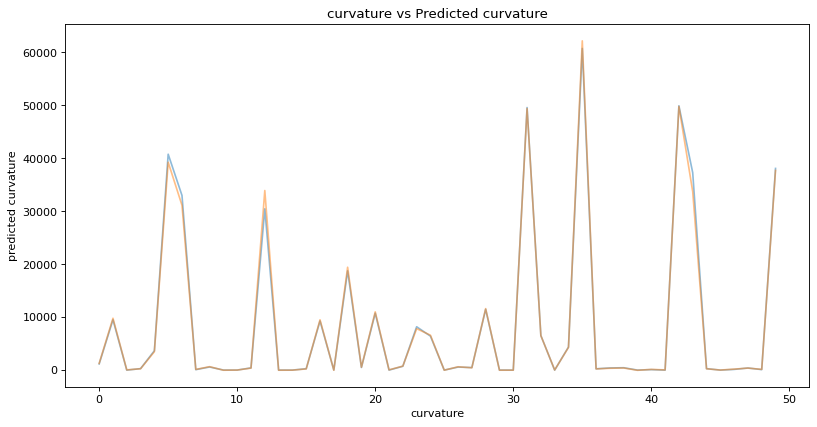

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.plot(y_valid.values[:50], label = "Actual", alpha=0.5)
plt.plot(results_valid[:50], label = "Predicted", alpha=0.5)
plt.xlabel("curvature")
plt.ylabel("predicted curvature")
plt.title("curvature vs Predicted curvature")
plt.show()

#### Decision trees

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# randomFor = RandomForestRegressor()
decTree = DecisionTreeRegressor()
decTree.fit(X_train, y_train)
results_valid = decTree.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

958027.6836341672


0.9956376913632987

#### Random Forest

In [52]:
randomFor = RandomForestRegressor()
randomFor.fit(X_train, y_train)
results_valid = randomFor.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

657113.9509084435


0.9970078799263181

#### Suport vector regressor

In [59]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train, y_train)
results_valid = SVR.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

251537696.98755702


-0.14535841371758784

In [60]:
from sklearn.linear_model import ElasticNetCV
elas = ElasticNetCV()
elas.fit(X_train, y_train)
results_valid = elas.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

156600513.93363652


0.28693107087141057

In [45]:
def make_dataset_from_ts(d, num_x=10, value=None):
    for idx in range(num_x):
        d['t-' + str(idx+1)] = d[value].shift(+(idx+1))
    return d[num_x:]

In [46]:
btc_price = btc[['date', 'PriceUSD']]
btc_price = btc_price.dropna()

KeyError: "['date'] not in index"

In [ ]:
btc_price.head()

In [ ]:
btc_price = make_dataset_from_ts(btc_price, num_x=1, value="PriceUSD")

In [ ]:
btc_price['log_diff'] = np.log(btc_price['PriceUSD']) - np.log(btc_price['t-1'])

In [ ]:
btc_price['change%'] = round(btc_price['log_diff']*100, 2)

In [ ]:
btc_price['target'] = [1 if btc_price > 0 else 0 for btc_price in btc_price['log_diff']]

In [ ]:
btc_price.head()

In [ ]:
years = [2010+year for year in range(12)]
print(years)


# **Change in price by year**

In [ ]:
#plot_btc = btc_price.set_index("date", inplace=True)
#print(plot_btc)
btc_price['PriceUSD'].plot()

In [ ]:
for el in years:
    print(""+ str(el)+ " in USD: Mean price: " + str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean(), 2)) +
        ",  Variance: " +str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].std(), 2)))
    if years.index(el) !=0:
        V1 = btc_price[btc_price['year'] == str(el-1)]['PriceUSD'].mean()
        V2 = btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean()
    print("Price change: " + str(round((V2 - V1)/abs(V1) * 100, 2)) + " %")


# **Daily predictive power of the crypto**

**Daily return difference by year**

```
# This is formatted as code
```

**

In [ ]:

#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)


fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
    btc_price[btc_price['year'] == str(el)].hist('log_diff', ax=axes[idx])
    axes[idx].set_title(str(el))


# **TIME SERIES ANALYSIS**

**Autocorrelation**

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
    plot_acf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
    axes[idx].set_title(str(el))

**Partial Autocorrelation**

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_pacf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Autocorrelation and Partial Autocorrelation for the whole time**

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1,figsize=(8, 4))
plot_acf(btc_price['PriceUSD'],  lags=30, ax=ax1)
axes[idx].set_title("Autocorrelation")
plot_pacf(btc_price['PriceUSD'],  lags=30, ax=ax2)
axes[idx].set_title("Parcial autocorrelation")

In [ ]:
fig, ((ax1)) = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(btc_price['PriceUSD'], ax = ax1)

In [ ]:
btc_price.head()

In [ ]:
btc_price['PriceUSD']

Prediction


In [ ]:
btc_price['PriceUSD']

In [ ]:
btc_price['PriceUSD']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

# **SOURCES:**


*   https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
*   https://pythondata.com/forecasting-time-series-autoregression/
* https://otexts.com/fpp2/what-can-be-forecast.html
